![tital](https://cognitiveclass.ai/wp-content/uploads/2017/11/cc-logo-square-300x300.png)
# Interest in different Data Science topics

In [86]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import json 

def __iter__(self): return 0


# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_31532d83d2a94d7881e4bdd07e7d5b0a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DlDf2gCk7d85iG_3lJLPbO0HBoOcCGoLGLID00kfiX33',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_31532d83d2a94d7881e4bdd07e7d5b0a.get_object(Bucket='datavisualizingwithpython-donotdelete-pr-cag3bwwwhrmmh3',Key='Topic_Survey_Assignment.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_DStopic= pd.read_csv(body)
df_DStopic.head()


,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [55]:
df_DStopic.shape

(6, 4)

In [56]:
df_DStopic.rename(columns={'Unnamed: 0':'Field Name'},inplace=True)
df_DStopic.set_index('Field Name',inplace=True)
df_DStopic.head()

,Very interested,Somewhat interested,Not interested
Field Name,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [57]:
df_DStopic.sort_values(['Very interested'],ascending=False,axis=0,inplace=True)
df_DStopic

,Very interested,Somewhat interested,Not interested
Field Name,,,
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [58]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [59]:
df_DSper=round((df_DStopic/2233)*100,2)
df_DSper

,Very interested,Somewhat interested,Not interested
Field Name,,,
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


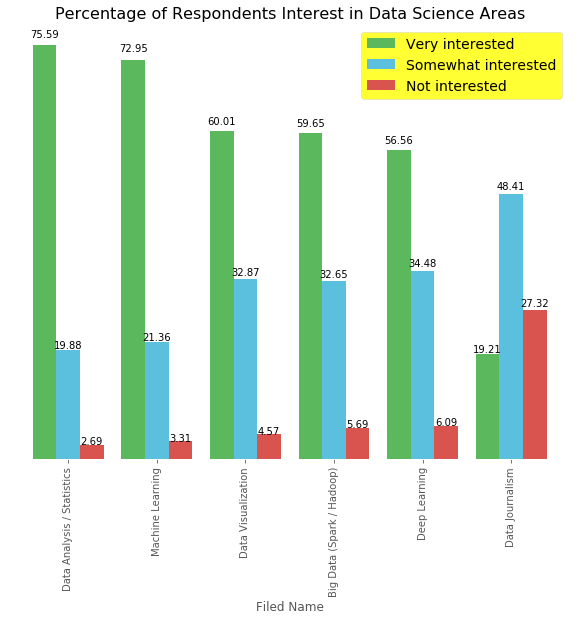

In [60]:
ax=df_DSper.plot(kind='bar',figsize=(10,8),color=['#5cb85c','#5bc0de','#d9534f'],width=.8,fontsize=10)
ax.set_title('Percentage of Respondents Interest in Data Science Areas',fontsize=16) # add title to the plot
ax.set_xlabel('Filed Name')
ax.set_facecolor('white')
ax.legend(fontsize=14,facecolor='yellow')
ax.get_yaxis().set_visible(False)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
